### 相関≠因果
#### 疑似相関
「テレビゲームに多くの時間を費やすほど、成績に悪影響を及ぼす」といった因果関係を考える。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/Ch6.data.csv')
data.head()

,grade,hours
0,66,0.0
1,58,0.1
2,54,3.6
3,71,0.0
4,62,0.9


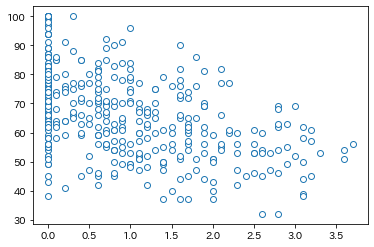

In [7]:
plt.plot(data.hours, data.grade, 'o', mfc='white')

全体的に右肩下がりの傾向が見られ、ゲームの時間と成績の間には負の相関が存在することが分かる。
しかし、テレビゲームに費やす時間が学業成績に直接的な影響を与えない場合であっても、図のような負の相関は観測されうる。
その理由として**疑似相関**がある。疑似相関とは、「2つの変数間に因果関係はなくとも、それらに共通して影響を与える第3の変数が存在する場合には、結果的に相関関係が観測されること」を表す。
テレビゲームの時間と学業成績に共通して影響を与える要因として考えられるものの1つとして、家庭環境があげられる。
家庭環境とは「親が共働きであるか」や「子供が自分の部屋をもっているか」などである。
テレビゲームの時間そのものは本質的な問題ではなく、「勉強時間が確保できる家庭環境をいかにつくるか」が重要と言える。
#### 偶然の相関
例えば、海賊の数と地球の平均気温を考えると負の相関があることがわかる。
この結果から「地球の温暖化問題を解決するためには海賊を保護し増やす必要がある」と考えるのは間違いで、両者に因果関係がないことは明らかである。
これは、「単なる偶然」であり、両者ともに時代の流れとともに変化していっただけである。

#### 同時性
明確な因果関係が存在するにも関わらず、観察される相関係数からでは、因果的な影響の大きさや正負が正しく判別できない場合もある。

In [9]:
data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/police_crime.csv', encoding='shift-jis')
data.head()

,Unnamed: 0,police,crime
0,愛知県,1.914967,13.01
1,青森県,1.996425,4.93
2,秋田県,2.250593,3.83
3,石川県,1.979315,6.47
4,茨城県,1.812279,12.00


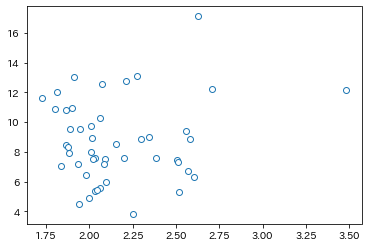

In [11]:
plt.plot(data.police, data.crime, 'o', mfc='white')

警察官の数と犯罪の数には正の相関がみられるが、警察官の数が増えれば犯罪は抑制されるはずと考えられるので、因果関係としてはこの2つには負の相関の関係が期待される。
これは同時性の観点から説明できる。
同時性とは「2つの事柄について、互いが互いの原因であり同時に結果であること」を表す。
犯罪件数の多い地域では犯罪抑制のためにより多くの警察官が配備され、同時に、警察の増強は犯罪を減らすものと考えられる。
もし、地域間の犯罪検挙率が均等化するように警察官が配備されるのであれば、結果的に正の相関が観察されることとなる。

### ルービンの因果モデル
#### トリートメントと潜在的な結果
変数の組$(Y,T)$における因果関係を考える。$Y$は何らかの結果・成果を表す変数、$T$はその原因を表す変数とする。
このような変数$T$を**トリートメント**と呼ぶ。
以下では、トリートメント$T$が0か1の値をとるダミー変数である場合に注目する。
ある個人$i$について、データとして$(Y_i,T_i)$が観測されているとする。
$T_i=1$であったときに得られる結果の値を$Y_{1i}=Y_i(T_i=1)$、逆に$T_i=0$であったときに得られる結果の値を$Y_{0i}=Y_i(T_i=0)$とする。
このとき、$T_i$の値は必ず0か1のどちらか一方しか実現しない、すなわち、$T_i=1$が実現しているときには、$Y_i=Y_{1i}$が結果として観測されるが、一方$Y_{0i}$は観測できない潜在的な値、いわゆる**反実仮想**の値となる。
同様に、$T_i=0$が実現しているときには、$Y_i=Y_{0i}$が結果として観測されるが、$Y_{1i}$は観測できない。

|トリートメントの実現値|観測される結果|観測されない潜在的結果|
|-|-|-|
|$$T_i=1$$|$$Y_i=Y_{1i}$$|$$Y_{0i}$$|
|$$T_i=0$$|$$Y_i=Y_{0i}$$|$$Y_{1i}$$|

$Y_i$について式にまとめると

$$
Y_i=\left\{
\begin{array}{ll}
Y_{1i} & if\ T_i=1 \\
Y_{0i} & if\ T_i=0
\end{array}
\right.
$$

あるいは

$$
Y_i=T_iY_{1i}+(1-T_i)Y_{0i}
$$

と書ける。

「個人$i$について$T$が$Y$に及ぼす因果的効果」は、
$$
Y_{1i}-Y_{0i}
$$

と定義される。この式は**トリートメント効果**と呼ばれる。
トリートメント効果は「$T_i=1(T_i=0)$を実際に選んだときに得られる結果と、そのとき選ばれなかった$T_i=0(T_i=1)$のもとでの結果の差」を表す。
一般的にトリートメント効果は個人ごとに異なる効果をとる。
このようにある変数からある変数への因果的効果を、観測できない潜在的な結果と比べて定義するアプローチを**ルービンの因果モデル**と呼ぶ。

#### 平均トリートメント効果
各個人$i$について、$Y_{0i}$と$Y_{1i}$の両方の値を知ることはできないので、トリートメント効果をデータから計算することは不可能である。
そこで、特定の個人ではなく、全体としての平均的なトリートメント効果、すなわち**平均トリートメント効果(ATE)**
$$
E[Y_{1i}-Y_{0i}]
$$
について考える。

データとして$\{(Y_i,T_i):i=1,\cdots,n\}$が得られたとする。
この時次の仮定が満たされているものとする。
$$
Y_{1i}=Y_i(T_1,\cdots,T_i=1,\cdots,T_n)\\
Y_{0i}=Y_i(T_1,\cdots,T_i=0,\cdots,T_n)
$$

これは「$i$以外の個人$j(i\neq j)$のトリートメントは、個人$i$の結果に影響しない」ということを意味する。
また、トリートメントが$T=1$である個人のグループ$\{i:T_i=1\}$を**トリートメントグループ**、$T=0$である個人のグループ$\{i:T_i=0\}$を**コントロールグループ**と呼ぶ。
ATEは各グループの$Y$の平均の差
$$
\frac{\sum_{i=1}^nT_iY_i}{\sum_{i=1}^nT_i}-\frac{\sum_{i=1}^n(1-T_i)Y_i}{\sum_{i=1}^n(1-T_i)}
$$

から推定できると考えらえる。

In [44]:
import numpy as np

n = 400
T = np.random.binomial(1, 0.6, n) # 確率0.6で1となるトリートメント変数
TE = 2 # トリートメント効果(個人差は無いと想定)
Y = TE*T + np.random.normal(n) # 成果変数

このシミュレーションでは、各個人$i$におけるトリートメント効果は2で等しく、平均トリートメント効果の値も2となる。
通常は平均トリートメント効果の値は事前にわからないので、この2という値を推定することが目標となる。
成果変数は
$$
Y=トリートメント効果×T+個人ごとの撹乱項
$$
として決まっているものと想定する。

In [45]:
EY1 = np.sum(T*Y)/np.sum(T) # トリートメントグループの平均値
EY0 = np.sum((1-T)*Y)/np.sum(1-T) # コントロールグループの平均値

# 以下のように計算してもよい
#EY1 = np.mean(Y[T==1])
#EY0 = np.mean(Y[T==0])

EY1 - EY0

1.9999999999999432

さらに、区間\[0,1\]上の一様分布に従う変数$Z$を作成し、トリートメント$T$は$Z$の値が大きいほど1を取りやすいものとする。
$$
Pr(T_i=1)=Z_i,\ Pr(T_i=0)=1-Z_i
$$

さらに、成果変数についても

$$
Y=トリートメント効果×T+(2Z-1)+個人ごとの撹乱項
$$

として$Z$の影響があるとする。

In [47]:
n = 400

Z = np.random.uniform(size=n)
T = np.random.binomial(1, Z, n) # 確率0.6で1となるトリートメント変数
TE = 2 # トリートメント効果(個人差は無いと想定)
Y = TE*T + (2*Z-1) +np.random.normal(n) # 成果変数

EY1 = np.sum(T*Y)/np.sum(T) # トリートメントグループの平均値
EY0 = np.sum((1-T)*Y)/np.sum(1-T) # コントロールグループの平均値

# 以下のように計算してもよい
#EY1 = np.mean(Y[T==1])
#EY0 = np.mean(Y[T==0])

EY1 - EY0

2.6436621434397125

明らかに2よりも大きな値が得られ、過大評価されていることがわかる。
$T$と$Y$に共通して影響を与える変数$Z$が存在する場合には、単純に$T$と$Y$の相関関係を調べただけではそれらの因果関係はわからない。